In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import kt_utils 

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = kt_utils.load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [3]:
def HappyModel(input_shape):
    """
    实现一个检测笑容的模型
    
    参数：
        input_shape - 输入的数据的维度
    返回：
        model - 创建的Keras的模型
        
    """
    
    #你可以参考和上面的大纲
    X_input = Input(input_shape)

    #使用0填充：X_input的周围填充0
    X = ZeroPadding2D((3, 3))(X_input)

    #对X使用 CONV -> BN -> RELU 块
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    #最大值池化层
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    #降维，矩阵转化为向量 + 全连接层
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    #创建模型，讲话创建一个模型的实体，我们可以用它来训练、测试。
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model


In [4]:
#创建一个模型实体
happy_model = HappyModel(X_train.shape[1:])
#编译模型
happy_model.compile("adam","binary_crossentropy", metrics=['accuracy'])
#训练模型
#请注意，此操作会花费你大约6-10分钟。
happy_model.fit(X_train, Y_train, epochs=40, batch_size=50)
#评估模型
preds = happy_model.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
print ("误差值 = " + str(preds[0]))
print ("准确度 = " + str(preds[1]))


Epoch 1/40
12/12 [==============================] - 1s 38ms/step - loss: 2.0453 - accuracy: 0.5567
Epoch 2/40
12/12 [==============================] - 0s 33ms/step - loss: 0.7365 - accuracy: 0.7550
Epoch 3/40
12/12 [==============================] - 0s 32ms/step - loss: 0.4433 - accuracy: 0.8233
Epoch 4/40
12/12 [==============================] - 0s 35ms/step - loss: 0.2080 - accuracy: 0.9083
Epoch 5/40
12/12 [==============================] - 0s 33ms/step - loss: 0.1493 - accuracy: 0.9383
Epoch 6/40
12/12 [==============================] - 0s 35ms/step - loss: 0.1200 - accuracy: 0.9617
Epoch 7/40
12/12 [==============================] - 0s 33ms/step - loss: 0.1056 - accuracy: 0.9650
Epoch 8/40
12/12 [==============================] - 0s 34ms/step - loss: 0.0920 - accuracy: 0.9800
Epoch 9/40
12/12 [==============================] - 0s 34ms/step - loss: 0.0760 - accuracy: 0.9833
Epoch 10/40
12/12 [==============================] - 0s 32ms/step - loss: 0.0664 - accuracy: 0.9783
Epoch 11/

In [5]:
model.summary()


Model: "HappyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv0 (Conv2D)              (None, 64, 64, 32)        4736      
                                                                 
 bn0 (BatchNormalization)    (None, 64, 64, 32)        128       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pool (MaxPooling2D)     (None, 32, 32, 32)        0         
                                                        

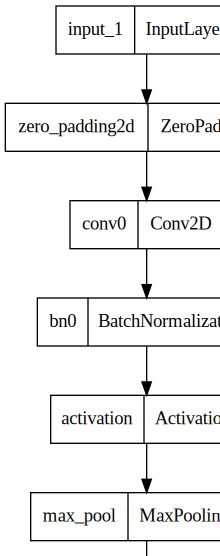

In [6]:
%matplotlib inline
plot_model(happy_model, to_file='happy_model.png')
SVG(model_to_dot(happy_model).create(prog='dot', format='svg'))
